In [1]:
from hw1_code_source import *

In [2]:
# Draw samples
a = get_a(2)
x_train, y_train = draw_sample(2, a, 10)
x_test, y_test = draw_sample(2, a, 100)

In [3]:
# Generate design matrix
d = 5
X_g = get_design_mat(x_train, 2)

In [4]:
########################## HW1 Q7 ##########################
def least_square_estimator(X, y):
    N, d = X.shape
    
    if N <= d:
        raise Exception("Invalid design matrix shape.")
    
    return np.dot(np.linalg.inv(np.dot(X.transpose(), X)), np.dot(X.transpose(), y))

########################## HW1 Q8 ##########################
def empirical_risk(X, b, y):
    risk_v = (np.dot(X, b) - y)**2
    
    return np.mean(risk_v)

In [5]:
# Plotting utility
def plot_predictors(x_train, y_train, d, axes = None, N=None):
    # Generate design matrices
    X_f = get_design_mat(x_train, d)
    
    # Perform estimation and risk computation
    b_min = least_square_estimator(X_f, y_train)
    risk = empirical_risk(X_f, b_min, y_train)
    
    # Plot
    title = f"$d={d}$,"
    title += f" N={N}," if N else ""
    title += f" Risk($f_b(x)$)={risk:.5f}"
    subplot = axes or plt
    subplot.scatter(x_train, y_train, label="Training Data")
    subplot.plot(x_train, y_train, label="g(x)", color="red")
    subplot.plot(x_train, X_f @ b_min, label="$f_b(x)$", color="green")
    subplot.legend(loc="upper right", fontsize="large")    
    
    if axes:
        subplot.set_title(title)
        subplot.set_xlim([0, 1])
        subplot.set_xlabel("x")
        subplot.set_ylabel("y")
    
    else:
        subplot.title(title)
        subplot.xlim([0, 1])
        subplot.xlabel("x")
        subplot.ylabel("y")
        subplot.savefig(f"plot_1_d{d}.pdf")
        subplot.show()

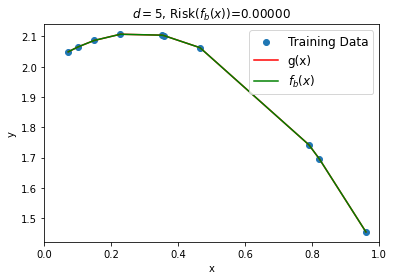

In [6]:
########################## HW1 Q9 ##########################
plot_predictors(x_train, y_train, d)

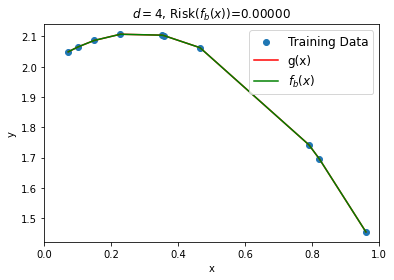

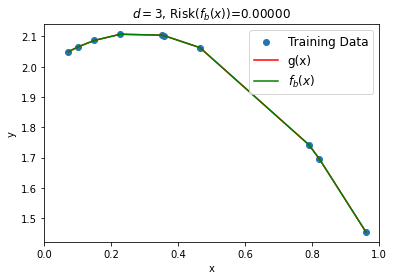

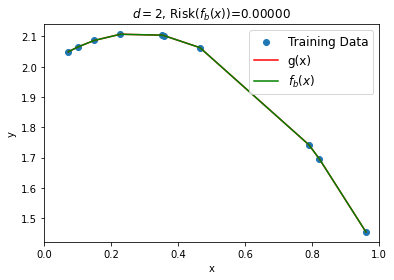

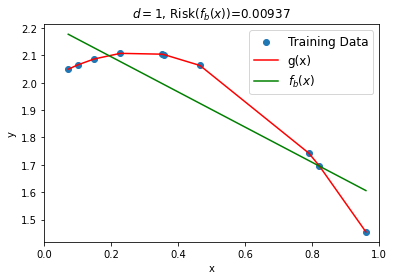

In [7]:
########################## HW1 Q10 ##########################
for d in range(4, 0, -1):
    plot_predictors(x_train, y_train, d)

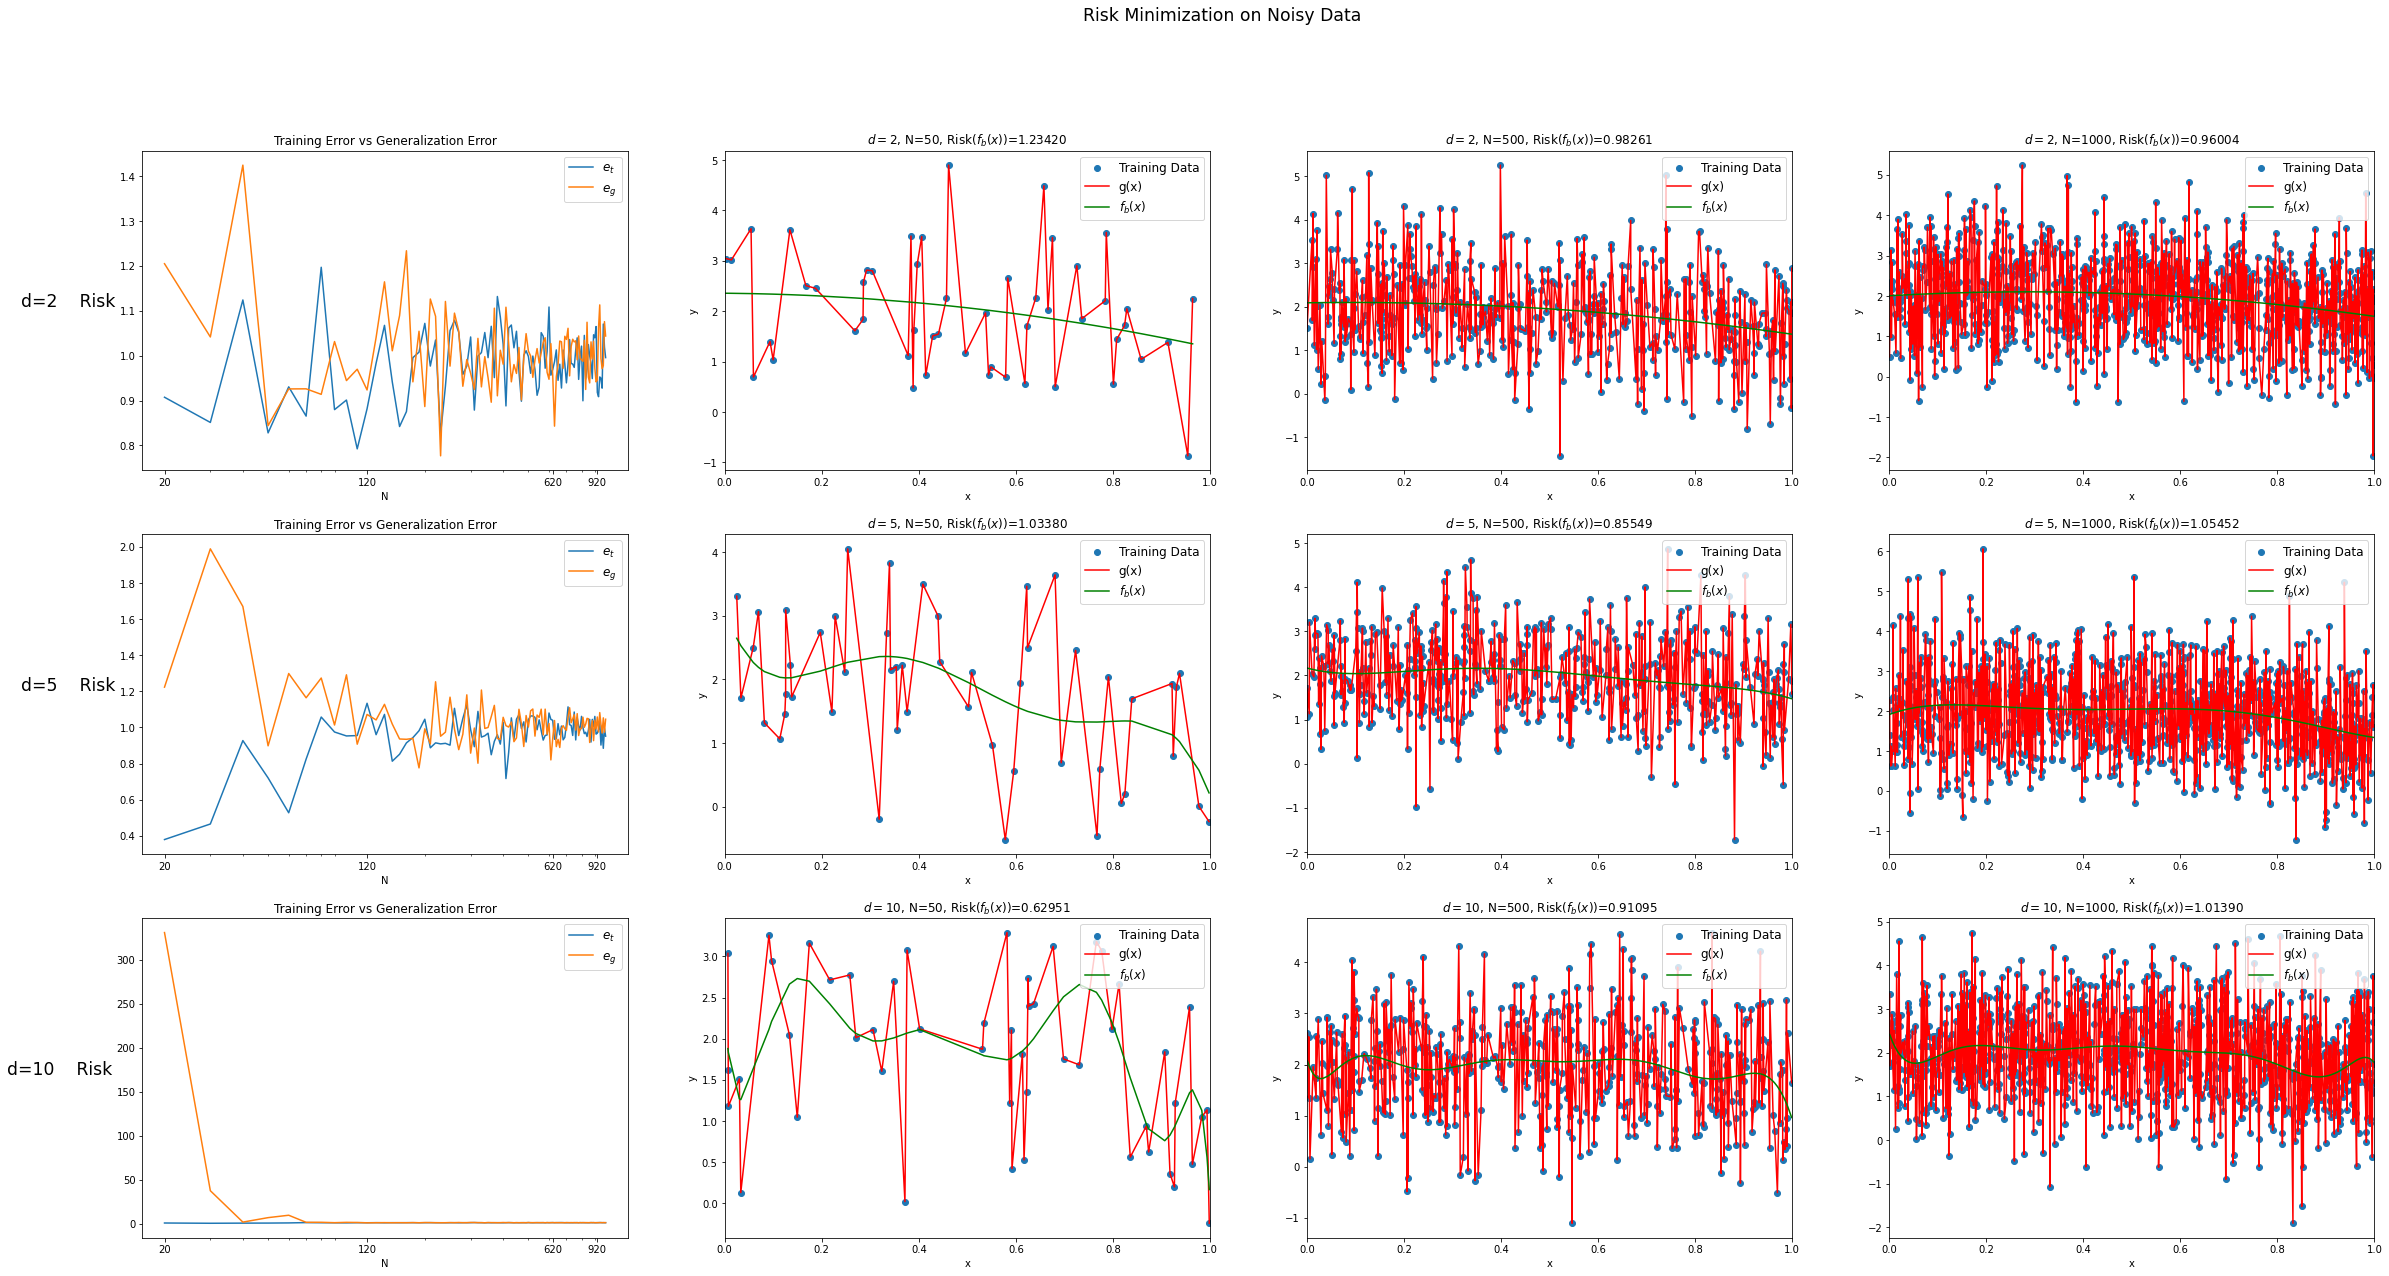

In [62]:
########################## HW1 Q11 ##########################
fig, axs = plt.subplots(3, 4)
fig.set_figheight(20)
fig.set_figwidth(40)
fig.suptitle("Risk Minimization on Noisy Data", fontsize="xx-large")
for i, d in enumerate([2, 5, 10]):
    training_error, generalization_error, N_vals = [], [], []
    error_plt = axs[i][0]
    for N in range(20,1000,10):
        # Draw samples and generate training and test data
        x_train, y_train = draw_sample_with_noise(2, a, N)
        x_test, y_test = draw_sample_with_noise(2, a, N)
        
        # Generate design matrices
        X_f_train = get_design_mat(x_train, d)
        X_f_test = get_design_mat(x_test, d)
        
        # Compute risk
        b_min = least_square_estimator(X_f_train, y_train)
        risk_train, risk_test = empirical_risk(X_f_train, b_min, y_train), empirical_risk(X_f_test, b_min, y_test)
        training_error.append(risk_train)
        generalization_error.append(risk_test)
        N_vals.append(N)
    
    error_plt.plot(N_vals, training_error, label="$e_t$")
    error_plt.plot(N_vals, generalization_error, label="$e_g$")
    error_plt.legend(loc="upper right", fontsize="large")
    error_plt.set_title("Training Error vs Generalization Error")
    error_plt.set_xscale("log")  
    error_plt.set_xlabel("N")
    xticks = [20, 120, 620, 920]
    error_plt.set_xticks(xticks)
    error_plt.set_xticklabels(map(str, xticks))
    error_plt.set_ylabel(f"d={d}    Risk", fontsize="xx-large", rotation="horizontal", horizontalalignment="right")
    
    for j, N in enumerate([50, 500, 1000]):
        # Draw samples and generate training and test data
        x_train, y_train = draw_sample_with_noise(2, a, N)
        
        # Plot predictors
        plot_predictors(x_train, y_train, d, axs[i][j+1], N)
        

fig.savefig("plot_2.pdf")

Estimation Error: 0.01834973324125433


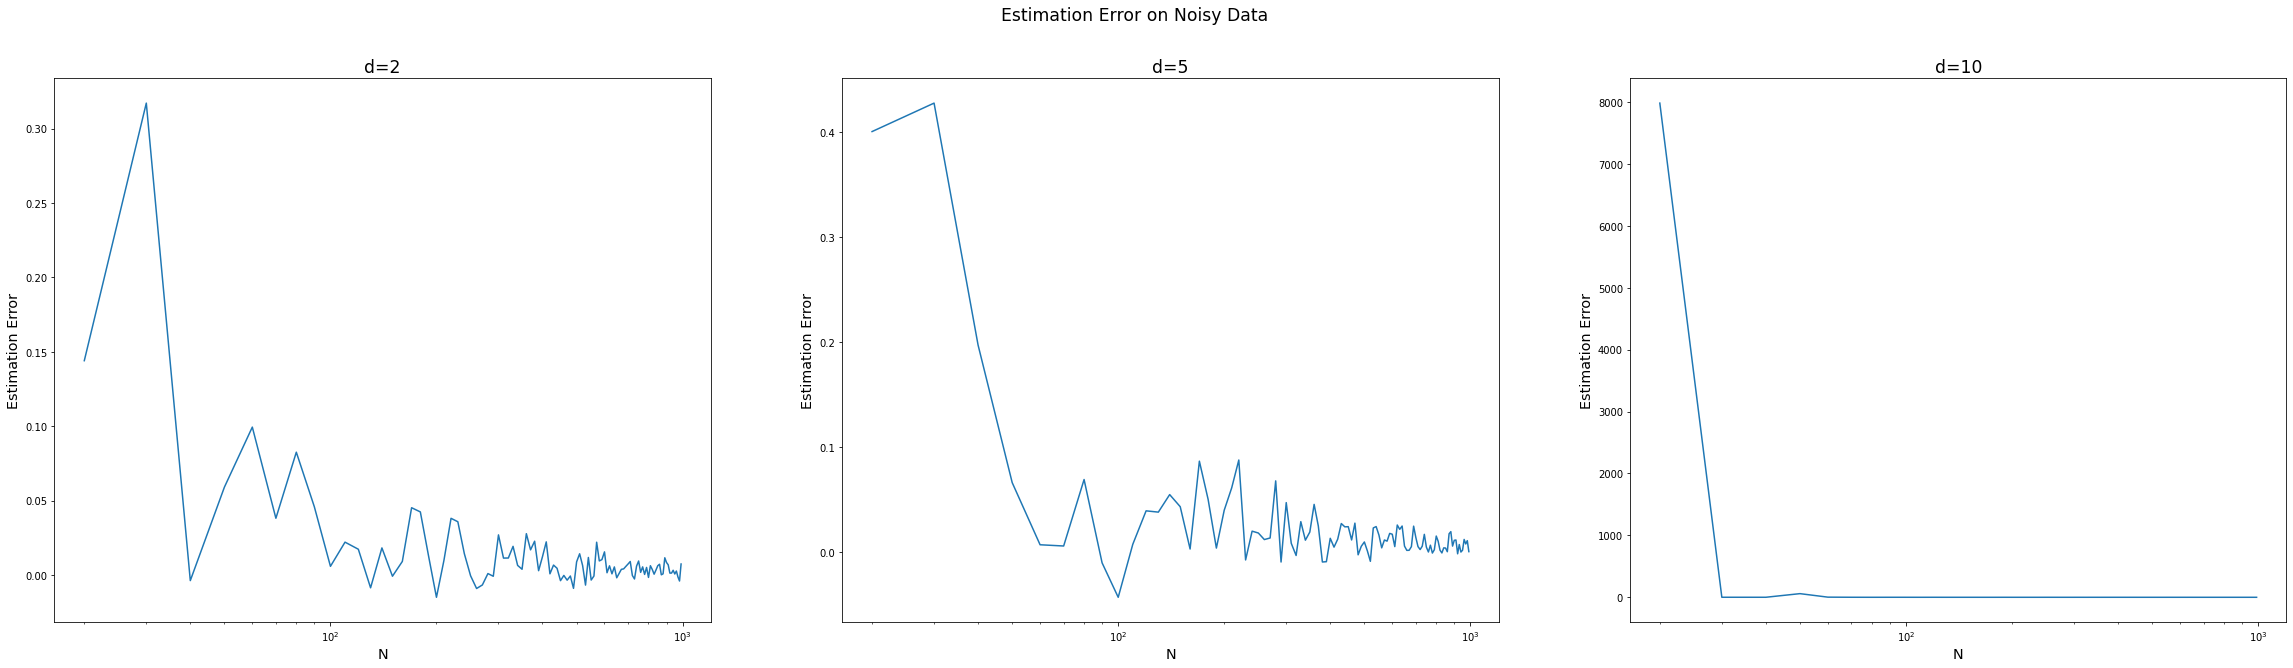

In [25]:
########################## HW1 Q12 ##########################
N=1000

# Draw samples
x_train, y_train = draw_sample_with_noise(2, a, N)
x_test, y_test = draw_sample_with_noise(2, a, N)

# Generate design matrices
X_f_train = get_design_mat(x_train, d)
X_f_test_a, X_f_test_d = get_design_mat(x_test, 2), get_design_mat(x_test, d)

# Estimate risk minimizer
b_erm = least_square_estimator(X_f_train, y_train)
risk_min, risk_emp = empirical_risk(X_f_test_a, a, y_test), empirical_risk(X_f_test_d, b_erm, y_test)
print(f"Estimation Error: {risk_emp - risk_min}")

# Error vs N
fig, axs = plt.subplots(1, 3)
fig.set_figheight(10)
fig.set_figwidth(40)
fig.suptitle("Estimation Error on Noisy Data", fontsize="xx-large")
for i, d in enumerate([2, 5, 10]):
    est_error_vals, N_vals = [], []
    for N in range(20,1000,10):
        # Draw samples and generate training and test data
        x_train, y_train = draw_sample_with_noise(2, a, N)
        x_test, y_test = draw_sample_with_noise(2, a, N)
        
        # Generate design matrices
        X_f_train = get_design_mat(x_train, d)
        X_f_test_a, X_f_test_d = get_design_mat(x_test, 2), get_design_mat(x_test, d)
        
        # Estimate risk minimizer
        b_erm = least_square_estimator(X_f_train, y_train)
        risk_min, risk_emp = empirical_risk(X_f_test_a, a, y_test), empirical_risk(X_f_test_d, b_erm, y_test)
        est_error_vals.append(risk_emp - risk_min)
        N_vals.append(N)
    
    axs[i].plot(N_vals, est_error_vals)
    axs[i].set_xlabel("N", fontsize="x-large")
    axs[i].set_ylabel("Estimation Error", fontsize="x-large")
    axs[i].set_title(f"d={d}", fontsize="xx-large")
    axs[i].set_xscale("log")

fig.savefig("plot_3.pdf")

In [77]:
ozone_data = np.loadtxt("ozone_wind.data")
ozone_data.shape

(111, 2)

[  1.78   4.9    6.72   7.52   7.73   8.8    9.     9.67   9.8   10.04
  11.31  11.79  11.8   12.25  12.98  13.46  13.49  13.6   13.91  14.2
  14.32  14.48  14.67  16.18  16.39  16.58  16.9   18.27  18.41  18.71
  18.9   19.91  20.2   20.69  20.69  20.99  21.25  21.36  21.49  21.93
  22.8   23.1   23.39  23.45  23.5   23.57  23.73  24.54  24.86  27.94
  28.52  28.97  29.92  30.15  30.38  31.19  32.83  32.83  32.86  34.68
  35.76  36.35  36.4   37.43  37.77  39.7   39.71  40.93  41.54  44.39
  44.46  44.83  45.11  45.8   46.92  47.18  48.11  49.78  50.89  52.25
  59.14  59.19  61.98  63.22  64.01  64.05  65.62  71.09  73.37  73.89
  76.52  77.76  78.03  79.78  80.88  82.07  84.08  85.01  85.72  89.62
  91.61  96.07  97.21  97.74 108.63 110.77 115.15 118.86 122.87 135.22
 168.74]


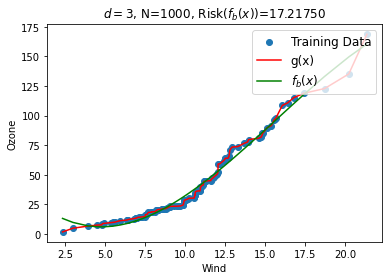

In [98]:
d=3
y_train, x_train = np.sort(ozone_data[:, 0]), np.sort(ozone_data[:, 1])


# Generate design matrices
X_f = get_design_mat(x_train, d)

# Perform estimation and risk computation
b_min = least_square_estimator(X_f, y_train)
risk = empirical_risk(X_f, b_min, y_train)

# Plot
title = f"$d={d}$,"
title += f" N={N}," if N else ""
title += f" Risk($f_b(x)$)={risk:.5f}"
plt.scatter(x_train, y_train, label="Training Data")
plt.plot(x_train, y_train, label="g(x)", color="red")
plt.plot(x_train, X_f @ b_min, label="$f_b(x)$", color="green")
plt.legend(loc="upper right", fontsize="large")
plt.title(title)
plt.xlabel("Wind")
plt.ylabel("Ozone")
plt.savefig(f"plot_1_d{d}.pdf")
plt.show()

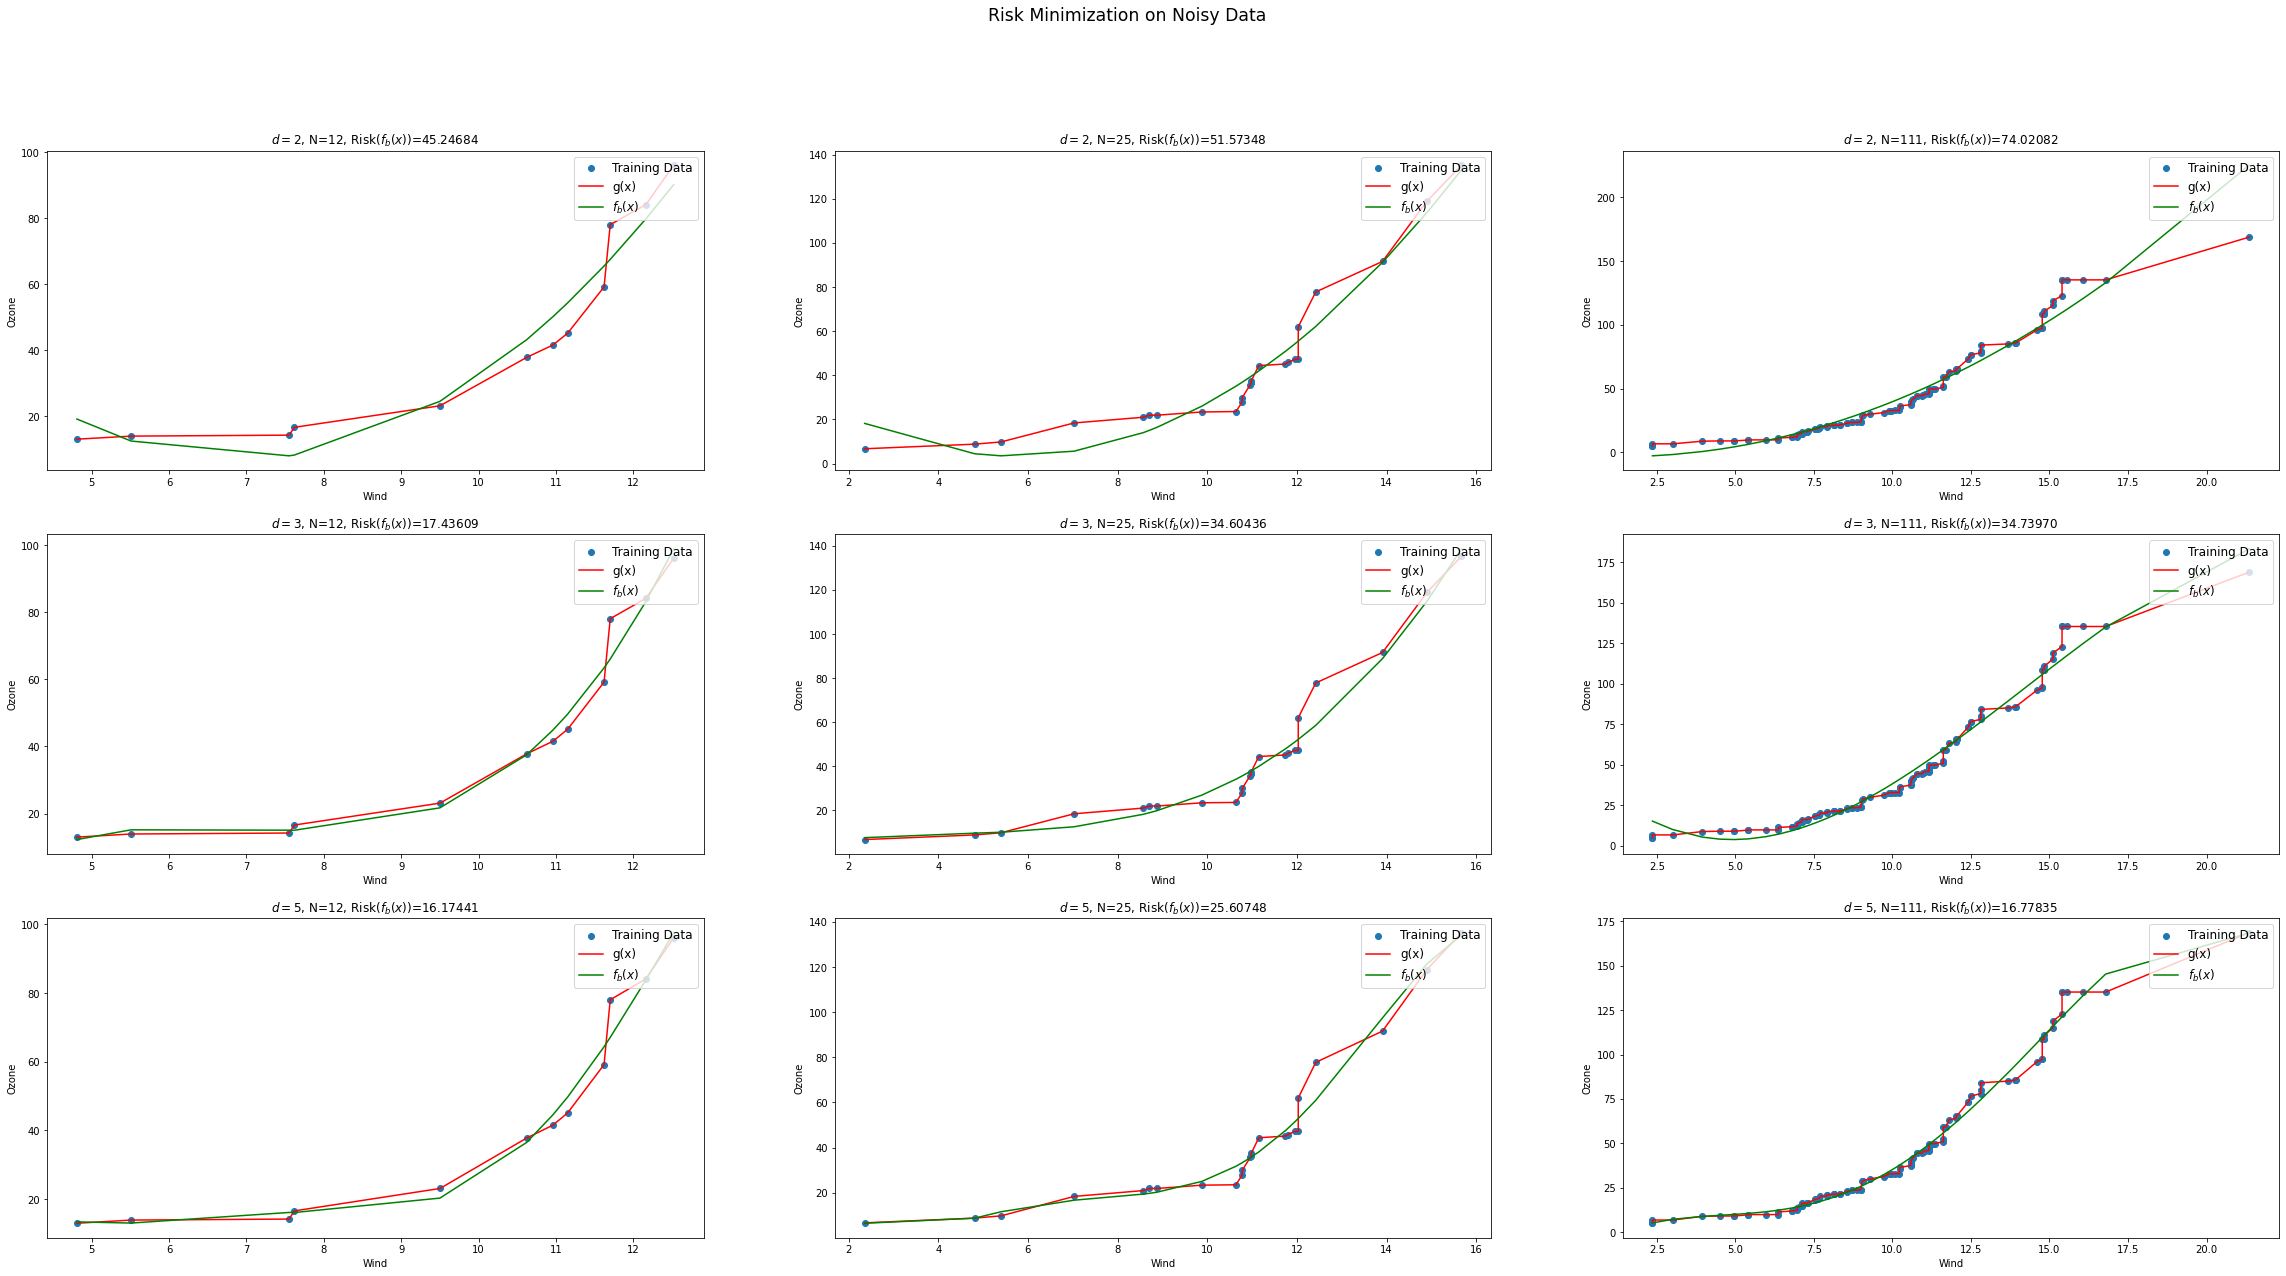

In [122]:
fig, axs = plt.subplots(3, 3)
fig.set_figheight(20)
fig.set_figwidth(40)
fig.suptitle("Risk Minimization on Noisy Data", fontsize="xx-large")
for j, N in enumerate([12, 25, 111]):
    # Draw samples and generate training and test data
    x_train, y_train = np.sort(np.random.choice(ozone_data[:, 1], size=N)), np.sort(np.random.choice(ozone_data[:, 0], size=N))

    for i, d in enumerate([2, 3, 5]):    
        # Generate design matrices
        X_f = get_design_mat(x_train, d)

        # Perform estimation and risk computation
        b_min = least_square_estimator(X_f, y_train)
        risk = empirical_risk(X_f, b_min, y_train)

        # Plot
        title = f"$d={d}$,"
        title += f" N={N}," if N else ""
        title += f" Risk($f_b(x)$)={risk:.5f}"
        axs[i][j].scatter(x_train, y_train, label="Training Data")
        axs[i][j].plot(x_train, y_train, label="g(x)", color="red")
        axs[i][j].plot(x_train, X_f @ b_min, label="$f_b(x)$", color="green")
        axs[i][j].legend(loc="upper right", fontsize="large")
        axs[i][j].set_title(title)
        axs[i][j].set_xlabel("Wind")
        axs[i][j].set_ylabel("Ozone")
        

fig.savefig("plot_5.pdf")